In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [92]:
df = pd.read_csv('diabetes.csv')

In [93]:
over = RandomOverSampler()
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X,y = over.fit_resample(X,y)
data = np.hstack(
    (X,np.reshape(y,(-1,1)))
)
data = pd.DataFrame(data,columns=df.columns)

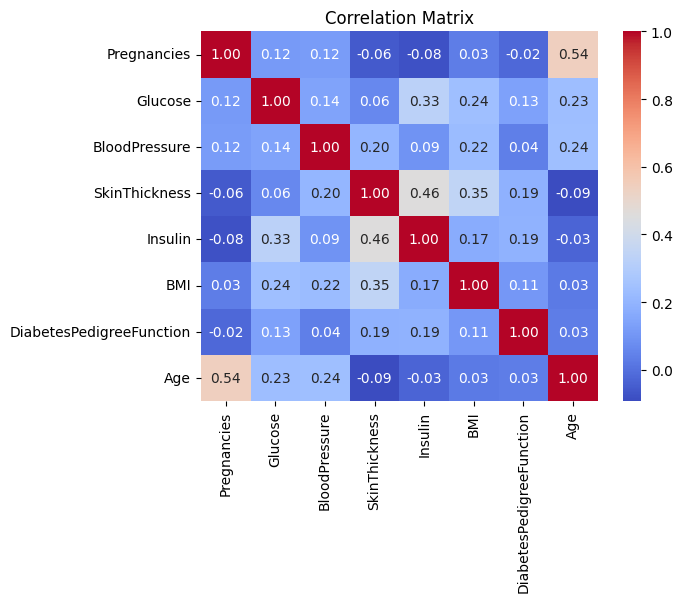

In [94]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
correlation_matrix = np.corrcoef(X, rowvar=False)

# Create a DataFrame from the correlation matrix
correlation_df = pd.DataFrame(correlation_matrix, columns=data.columns[:-1], index=data.columns[:-1])

# Plot the correlation matrix
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [95]:
(len(data[data["Outcome"] == 0]),len(data[data["Outcome"] == 1]))

(500, 500)

In [96]:
X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=.4,random_state=0)
X_valid,X_test,y_valid,y_test = train_test_split(X_temp,y_temp,test_size=.5,random_state=0)

In [97]:
model= tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation="relu"),
     tf.keras.layers.Dense(16,activation="relu"),
     tf.keras.layers.Dense(1,activation="sigmoid")#0 or 1
])

In [102]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [103]:
model.evaluate(X_train,y_train)

19/19 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.6133


[0.6424286365509033, 0.6133333444595337]

In [104]:
model.evaluate(X_valid,y_valid)

7/7 [==============================] - 0s 2ms/step - loss: 0.6253 - accuracy: 0.6300


[0.6252970695495605, 0.6299999952316284]

In [105]:
model.fit(
    X_train,y_train,batch_size=16,epochs=20,validation_data=(X_valid,y_valid)
)

Epoch 1/20
38/38 [==============================] - 1s 4ms/step - loss: 0.6191 - accuracy: 0.6550 - val_loss: 0.5747 - val_accuracy: 0.7100
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5800 - accuracy: 0.7000 - val_loss: 0.5424 - val_accuracy: 0.7450
Epoch 3/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5543 - accuracy: 0.7117 - val_loss: 0.5218 - val_accuracy: 0.7550
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5387 - accuracy: 0.7167 - val_loss: 0.5057 - val_accuracy: 0.7550
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5267 - accuracy: 0.7283 - val_loss: 0.4938 - val_accuracy: 0.7650
Epoch 6/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5181 - accuracy: 0.7333 - val_loss: 0.4826 - val_accuracy: 0.7800
Epoch 7/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5110 - accuracy: 0.7383 - val_loss: 0.4757 - val_accuracy: 0.7750
Epoch 8/20
38/38 [==

In [106]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4646 - accuracy: 0.7450


[0.4645784795284271, 0.7450000047683716]